## ** 기말고사 프로젝트 <기말고사 프로젝트 - 100점>**

### **(1) 각각의 문제 바로 아래에 답을 작성 후, Bigdata_project(기말고사).ipynb 파일을 한림SmartLEAD에 제출할 것**
### **(2) 제출 데드라인 : 2021.11.29(월요일) ~ 2021.12.12(일요일) 23:59 까지**
### **(3) 부정행위 적발 시, 원본(보여준 사람)과 복사본(베낀 사람) 모두 0점 처리**
### **(4) !!해당 문제의 코드와 출력 결과를 반드시 기록할 것(둘 중 하나라도 없으면 해당 문제 0점처리)!!**

- - -


### **1. Titanic 데이터를 사용하여 ``로지스틱 회귀분석(Logistic Regression)``,``의사결정트리(Decision Tree)``, ``랜덤포레스트(Randomforest)``, ``SVM(Support Vector Machine)``생성 모델을 만들고 생성한 모델을 Kaggle에 제출하여 점수를 획득 하시오.**

<br>

#### **다음의 조건을 만족해야 함**

```
## 조건
1. 모델 생성에 필요한 전처리 과정을 진행 하시오.
2. 모든 모델의 생성 과정을 코드로 명시 하시오.
3. 적절한 반응변수와 설명변수를 설정 하시오
4. 주어진 Train set으로 모델을 생성하시오.
5. Feature selection(변수 선택), Hyperparameter 튜닝을 진행 하시오.
6. Test set을 이용한 Predict(예측)
7. 생성한 모델중 가장 높은 점수를 획득한 모델의 최고 점수를 Keggle에 올려 Keggle점수 이미지를 첨부하시오.
```

In [ ]:
install.packages(c("data.table","Hmisc","caret","tidyverse","e1071"))
library(Hmisc)
library(data.table)
library(tidyverse)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [ ]:
train <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv") %>%
 as_tibble() ## train 데이터 

In [ ]:
test <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv") %>%
 as_tibble() ## test 데이터 

#### **1. 로지스틱 회귀분석(Logistic Regression)**

In [ ]:
## 코드 작성

In [ ]:
str(train)

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


### **<결측값 확인>**

In [ ]:
train %>% summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

### **범주형 변수 인지 확인**

In [ ]:
train$Survived %>% unique()
train$Pclass %>% unique()
train$Sex %>% unique()
train$Ticket %>% unique()
train$Embarked %>% unique()

[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "A/5 21171"          "PC 17599"           "STON/O2. 3101282"  
  [4] "113803"             "373450"             "330877"            
  [7] "17463"              "349909"             "347742"            
 [10] "237736"             "PP 9549"            "113783"            
 [13] "A/5. 2151"          "347082"             "350406"            
 [16] "248706"             "382652"             "244373"            
 [19] "345763"             "2649"               "239865"            
 [22] "248698"             "330923"             "113788"            
 [25] "347077"             "2631"               "19950"             
 [28] "330959"             "349216"             "PC 17601"          
 [31] "PC 17569"           "335677"             "C.A. 24579"        
 [34] "PC 17604"           "113789"             "2677"              
 [37] "A./5. 2152"         "345764"             "2651"              
 [40] "7546"               "11668"              "349253"            
 [43] "SC/Paris 2123"      "330958"             "S.C./A.4. 23567"   
 [46] "370371"             "14311"              "2662"              
 [49] "349237"             "3101295"            "A/4. 39886"        
 [52] "PC 17572"           "2926"               "113509"            
 [55] "19947"              "C.A. 31026"         "2697"              
 [58] "C.A. 34651"         "CA 2144"            "2669"              
 [61] "113572"             "36973"              "347088"            
 [64] "PC 17605"           "2661"               "C.A. 29395"        
 [67] "S.P. 3464"          "3101281"            "315151"            
 [70] "C.A. 33111"         "S.O.C. 14879"       "2680"              
 [73] "1601"               "348123"             "349208"            
 [76] "374746"             "248738"             "364516"            
 [79] "345767"             "345779"             "330932"            
 [82] "113059"             "SO/C 14885"         "3101278"           
 [85] "W./C. 6608"         "SOTON/OQ 392086"    "343275"            
 [88] "343276"             "347466"             "W.E.P. 5734"       
 [91] "C.A. 2315"          "364500"             "374910"            
 [94] "PC 17754"           "PC 17759"           "231919"            
 [97] "244367"             "349245"             "349215"            
[100] "35281"              "7540"               "3101276"           
[103] "349207"             "343120"             "312991"            
[106] "349249"             "371110"             "110465"            
[109] "2665"               "324669"             "4136"              
[112] "2627"               "STON/O 2. 3101294"  "370369"            
[115] "PC 17558"           "A4. 54510"          "27267"             
[118] "370372"             "C 17369"            "2668"              
[121] "347061"             "349241"             "SOTON/O.Q. 3101307"
[124] "A/5. 3337"          "228414"             "C.A. 29178"        
[127] "SC/PARIS 2133"      "11752"              "7534"              
[130] "PC 17593"           "2678"               "347081"            
[133] "STON/O2. 3101279"   "365222"             "231945"            
[136] "C.A. 33112"         "350043"             "230080"            
[139] "244310"             "S.O.P. 1166"        "113776"            
[142] "A.5. 11206"         "A/5. 851"           "Fa 265302"         
[145] "PC 17597"           "35851"              "SOTON/OQ 392090"   
[148] "315037"             "CA. 2343"           "371362"            
[151] "C.A. 33595"         "347068"             "315093"            
[154] "363291"             "113505"             "PC 17318"          
[157] "111240"             "STON/O 2. 3101280"  "17764"             
[160] "350404"             "4133"               "PC 17595"          
[163] "250653"             "LINE"               "SC/PARIS 2131"     
[166] "230136"             "315153"             "113767"            
[169] "370365"             "111428"             "364849"            
[172] "349247"             "234604"             "28424"             


[1] "S" "C" "Q" ""

### **Age 결측값 확인 impute를 통해 중간 값으로 바꿈**

In [ ]:
train <- train %>%
  select(-PassengerId,-Name,-Cabin,-Ticket) %>% mutate_at(c("Survived","Sex","Embarked"),factor)
summary(train)

 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.70   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                       NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

In [ ]:
train$Age <- impute(train$Age, median)

In [ ]:
train %>% summary()


 177 values imputed to 28 



 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.36   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           

### **<모델 생성>**

In [ ]:
m <- glm(Survived ~ ., data = train, family = "binomial")
summary(m)


Call:
glm(formula = Survived ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6389  -0.5884  -0.4198   0.6200   2.4440  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.539322 610.559090   0.029   0.9771    
Pclass       -1.098660   0.143543  -7.654 1.95e-14 ***
Sexmale      -2.719922   0.200663 -13.555  < 2e-16 ***
Age          -0.039330   0.007845  -5.013 5.35e-07 ***
SibSp        -0.324239   0.108889  -2.978   0.0029 ** 
Parch        -0.088638   0.118505  -0.748   0.4545    
Fare          0.001940   0.002374   0.817   0.4138    
EmbarkedC   -12.292402 610.558906  -0.020   0.9839    
EmbarkedQ   -12.355233 610.558958  -0.020   0.9839    
EmbarkedS   -12.703877 610.558890  -0.021   0.9834    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual devian

### **<Feature selection 진행>**

In [ ]:
m2 <- step(m,direction = "backward")

Start:  AIC=804.93
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance     AIC
- Embarked  3   789.18  803.18
- Parch     1   785.50  803.50
- Fare      1   785.65  803.65
<none>          784.93  804.93
- SibSp     1   795.32  813.32
- Age       1   812.05  830.05
- Pclass    1   844.15  862.15
- Sex       1  1016.05 1034.05

Step:  AIC=803.18
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance     AIC
- Parch   1   790.02  802.02
- Fare    1   790.78  802.78
<none>        789.18  803.18
- SibSp   1   801.32  813.32
- Age     1   816.75  828.75
- Pclass  1   850.42  862.42
- Sex     1  1033.69 1045.69

Step:  AIC=802.02
Survived ~ Pclass + Sex + Age + SibSp + Fare

         Df Deviance     AIC
- Fare    1   791.23  801.23
<none>        790.02  802.02
- SibSp   1   805.50  815.50
- Age     1   817.36  827.36
- Pclass  1   854.66  864.66
- Sex     1  1038.18 1048.18

Step:  AIC=801.23
Survived ~ Pclass + Sex + Age + SibSp

      

In [ ]:
summary(m2)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6817  -0.6029  -0.4159   0.6161   2.4327  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.177025   0.477338  10.846  < 2e-16 ***
Pclass      -1.175654   0.120073  -9.791  < 2e-16 ***
Sexmale     -2.739477   0.193984 -14.122  < 2e-16 ***
Age         -0.039553   0.007761  -5.096 3.47e-07 ***
SibSp       -0.354433   0.103392  -3.428 0.000608 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual deviance:  791.23  on 886  degrees of freedom
AIC: 801.23

Number of Fisher Scoring iterations: 5


### **<test set 으로 예측하기>**

In [ ]:
test %>% summary()

  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

### **<결측 값 중간 값 처리>**

In [ ]:
test$Age <- impute(test$Age, median)
test %>% summary()


 86 values imputed to 27 



  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :29.60   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:35.75   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

### **<범주형 변수 전환>**

In [ ]:
test <- test %>%
  select(-Name,-Cabin,-Ticket) %>% mutate_at(c("Sex","Embarked"), factor)
summary(test)


 86 values imputed to 27 



  PassengerId         Pclass          Sex           Age            SibSp       
 Min.   : 892.0   Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000  
 1st Qu.: 996.2   1st Qu.:1.000   male  :266   1st Qu.:23.00   1st Qu.:0.0000  
 Median :1100.5   Median :3.000                Median :27.00   Median :0.0000  
 Mean   :1100.5   Mean   :2.266                Mean   :29.60   Mean   :0.4474  
 3rd Qu.:1204.8   3rd Qu.:3.000                3rd Qu.:35.75   3rd Qu.:1.0000  
 Max.   :1309.0   Max.   :3.000                Max.   :76.00   Max.   :8.0000  
                                                                               
     Parch             Fare         Embarked
 Min.   :0.0000   Min.   :  0.000   C:102   
 1st Qu.:0.0000   1st Qu.:  7.896   Q: 46   
 Median :0.0000   Median : 14.454   S:270   
 Mean   :0.3923   Mean   : 35.627           
 3rd Qu.:0.0000   3rd Qu.: 31.500           
 Max.   :9.0000   Max.   :512.329           
                  NA's   :1                 

### **<예측하기>**

In [ ]:
predict_value <- predict(m2, test, type = "response") %>% tibble(Survived = .)
predict_cutoff <- test %>% select(PassengerId) %>% dplyr::bind_cols(., predict_value) %>%
  mutate(Survived = ifelse(Survived >= 0.4169107,1,0))

In [ ]:
predict_cutoff %>% show()

# A tibble: 418 × 2
   PassengerId Survived
         <int>    <dbl>
 1         892        0
 2         893        0
 3         894        0
 4         895        0
 5         896        1
 6         897        0
 7         898        1
 8         899        0
 9         900        1
10         901        0
# … with 408 more rows


In [ ]:
predict_cutoff %>% write_csv(path = "submission.csv")

Warning message:
“The `path` argument of `write_csv()` is deprecated as of readr 1.4.0.
Please use the `file` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


#### **2. 의사결정트리(Decision Tree)**

In [ ]:
## 코드 작성

In [ ]:
train2 <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv") %>%
 as_tibble() ## train 데이터 

In [ ]:
test2 <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv") %>%
 as_tibble() ## test 데이터 

In [ ]:
str(train2)

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
train2 %>% summary()

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

### **<범주형 변수 확인>**

In [ ]:
train2$Survived %>% unique()
train2$Pclass %>% unique()
train2$Sex %>% unique()
train2$Ticket %>% unique()
train2$Embarked %>% unique()

[1] 0 1

[1] 3 1 2

[1] "male"   "female"

[1] "A/5 21171"          "PC 17599"           "STON/O2. 3101282"  
  [4] "113803"             "373450"             "330877"            
  [7] "17463"              "349909"             "347742"            
 [10] "237736"             "PP 9549"            "113783"            
 [13] "A/5. 2151"          "347082"             "350406"            
 [16] "248706"             "382652"             "244373"            
 [19] "345763"             "2649"               "239865"            
 [22] "248698"             "330923"             "113788"            
 [25] "347077"             "2631"               "19950"             
 [28] "330959"             "349216"             "PC 17601"          
 [31] "PC 17569"           "335677"             "C.A. 24579"        
 [34] "PC 17604"           "113789"             "2677"              
 [37] "A./5. 2152"         "345764"             "2651"              
 [40] "7546"               "11668"              "349253"            
 [43] "SC/Paris 2123"      "330958"             "S.C./A.4. 23567"   
 [46] "370371"             "14311"              "2662"              
 [49] "349237"             "3101295"            "A/4. 39886"        
 [52] "PC 17572"           "2926"               "113509"            
 [55] "19947"              "C.A. 31026"         "2697"              
 [58] "C.A. 34651"         "CA 2144"            "2669"              
 [61] "113572"             "36973"              "347088"            
 [64] "PC 17605"           "2661"               "C.A. 29395"        
 [67] "S.P. 3464"          "3101281"            "315151"            
 [70] "C.A. 33111"         "S.O.C. 14879"       "2680"              
 [73] "1601"               "348123"             "349208"            
 [76] "374746"             "248738"             "364516"            
 [79] "345767"             "345779"             "330932"            
 [82] "113059"             "SO/C 14885"         "3101278"           
 [85] "W./C. 6608"         "SOTON/OQ 392086"    "343275"            
 [88] "343276"             "347466"             "W.E.P. 5734"       
 [91] "C.A. 2315"          "364500"             "374910"            
 [94] "PC 17754"           "PC 17759"           "231919"            
 [97] "244367"             "349245"             "349215"            
[100] "35281"              "7540"               "3101276"           
[103] "349207"             "343120"             "312991"            
[106] "349249"             "371110"             "110465"            
[109] "2665"               "324669"             "4136"              
[112] "2627"               "STON/O 2. 3101294"  "370369"            
[115] "PC 17558"           "A4. 54510"          "27267"             
[118] "370372"             "C 17369"            "2668"              
[121] "347061"             "349241"             "SOTON/O.Q. 3101307"
[124] "A/5. 3337"          "228414"             "C.A. 29178"        
[127] "SC/PARIS 2133"      "11752"              "7534"              
[130] "PC 17593"           "2678"               "347081"            
[133] "STON/O2. 3101279"   "365222"             "231945"            
[136] "C.A. 33112"         "350043"             "230080"            
[139] "244310"             "S.O.P. 1166"        "113776"            
[142] "A.5. 11206"         "A/5. 851"           "Fa 265302"         
[145] "PC 17597"           "35851"              "SOTON/OQ 392090"   
[148] "315037"             "CA. 2343"           "371362"            
[151] "C.A. 33595"         "347068"             "315093"            
[154] "363291"             "113505"             "PC 17318"          
[157] "111240"             "STON/O 2. 3101280"  "17764"             
[160] "350404"             "4133"               "PC 17595"          
[163] "250653"             "LINE"               "SC/PARIS 2131"     
[166] "230136"             "315153"             "113767"            
[169] "370365"             "111428"             "364849"            
[172] "349247"             "234604"             "28424"             


[1] "S" "C" "Q" ""

### **<factor로 바꾸기>**

In [ ]:
train2 <- train2 %>%
  select(-PassengerId,-Name,-Cabin,-Ticket) %>% mutate_at(c("Survived","Sex","Embarked"),factor)
summary(train2)

 Survived     Pclass          Sex           Age            SibSp      
 0:549    Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
          Median :3.000                Median :28.00   Median :0.000  
          Mean   :2.309                Mean   :29.70   Mean   :0.523  
          3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
          Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                       NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

In [ ]:
library(caret) 
set.seed(31)

index <- createDataPartition(y = train2$Survived, p = 0.7, list = FALSE) 
head(index, 20)


Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift




Resample1
1
2
3
5
6
7
8
10
11
12


### **<나이에 따른 생존율을 확인하기 위해 사용>**

In [ ]:
train2$Age <- impute(train2$Age, median)

In [ ]:
train3 <- train2[index, ]
test3 <- train2[-index, ]

train3 %>% show()
test3 %>% show()

# A tibble: 625 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0             3 male   22           1     0  7.25 S       
 2 1             1 female 38           1     0 71.3  C       
 3 1             3 female 26           0     0  7.92 S       
 4 0             3 male   35           0     0  8.05 S       
 5 0             3 male   28           0     0  8.46 Q       
 6 0             1 male   54           0     0 51.9  S       
 7 0             3 male    2           3     1 21.1  S       
 8 1             2 female 14           1     0 30.1  C       
 9 1             3 female  4           1     1 16.7  S       
10 1             1 female 58           0     0 26.6  S       
# … with 615 more rows
# A tibble: 266 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1             1 female 35           1     0 53.1  S       
 2 1   

### **<의사결정트리 모델 생성>**

In [ ]:
library(rpart)
ti_detection <- rpart(formula = Age ~ ., data = train3, method = "class")

In [ ]:
summary(ti_detection)

Call:
rpart(formula = Age ~ ., data = train3, method = "class")
  n= 625 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0

Node number 1: 625 observations
  predicted class=28  expected loss=0.7696  P(node) =1
    class counts:     1     2     2     1     7     7     5     4     3     3     1     2     8     1     1     1     1     4     1     3     9     6    16    14    10     1    19    20    12     1    20     1    16    10    11   144     2    14    21     1    12    12     1    12    14    15    14     6     7    11     9     2     5    12     5     6     6     1     3     4     8     2     5     6     6     4     2     1     3     1     3     2     3     2     4     2     1     2     1     2     1     1
   probabilities: 0.002 0.003 0.003 0.002 0.011 0.011 0.008 0.006 0.005 0.005 0.002 0.003 0.013 0.002 0.002 0.002 0.002 0.006 0.002 0.005 0.014 0.010 0.026 0.022 0.016 0.002 0.030 0.032 0.019 0.002 0.032 0.002 0.026 0.016 0.018 0.230 0.003 0.022 0.034 0.002 0

In [ ]:
test3 %>% show()

# A tibble: 266 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>     <int> <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1             1 female 35           1     0 53.1  S       
 2 1             3 female 27           0     2 11.1  S       
 3 1             1 male   28           0     0 35.5  S       
 4 0             3 male   28           0     0  7.22 C       
 5 0             3 male   28           0     0  7.90 S       
 6 0             2 male   66           0     0 10.5  S       
 7 1             3 male   28           0     0  7.23 C       
 8 1             3 female 14           1     0 11.2  C       
 9 1             3 female 19           0     0  7.88 Q       
10 1             1 female 49           1     0 76.7  C       
# … with 256 more rows


In [ ]:
install.packages(c("rattle", "rpart.plot"))

library(rattle)
library(rpart.plot)
library(RColorBrewer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’


Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [ ]:
ti_detection$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror))

min_xerror_cp <- ti_detection$cptable %>% as_tibble() %>%
  filter(xerror == min(xerror)) %>% pull(CP)

CP,nsplit,rel error,xerror,xstd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,1,0,0


### **<test를 이용한 예측하기>**

In [ ]:
predict_value2 <- predict(ti_detection, test3, type = "class") %>% 
 tibble(predict_value = .)

In [ ]:
predict_value2 %>% show()

# A tibble: 266 × 1
   predict_value
   <fct>        
 1 28           
 2 28           
 3 28           
 4 28           
 5 28           
 6 28           
 7 28           
 8 28           
 9 28           
10 28           
# … with 256 more rows


In [ ]:
predict_check2 <- test3 %>% select(Age) %>% dplyr::bind_cols(., predict_value2) 
predict_check2 %>% show()

# A tibble: 266 × 2
   Age      predict_value
   <impute> <fct>        
 1 35       28           
 2 27       28           
 3 28       28           
 4 28       28           
 5 28       28           
 6 66       28           
 7 28       28           
 8 14       28           
 9 19       28           
10 49       28           
# … with 256 more rows


In [ ]:
predict_check2 %>% write_csv(path = "submission2.csv")

#### **3. 랜덤포레스트(Randomforest)**

In [ ]:
## 코드 작성

In [ ]:
install.packages(c("ipred","randomForest"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### **<train과 test 합치기>**

In [ ]:
full <- bind_rows(train,test)

In [ ]:
str(full)
summary(full)
glimpse(full)

tibble [1,309 × 9] (S3: tbl_df/tbl/data.frame)
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : int [1:1309] 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : Named num [1:1309] 22 38 26 35 35 28 54 2 27 14 ...
  ..- attr(*, "names")= chr [1:1309] "1" "2" "3" "4" ...
 $ SibSp      : int [1:1309] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:1309] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare       : num [1:1309] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 $ PassengerId: int [1:1309] NA NA NA NA NA NA NA NA NA NA ...
 - attr(*, ".internal.selfref")=<externalptr> 


 Survived       Pclass          Sex           Age            SibSp       
 0   :549   Min.   :1.000   female:466   Min.   : 0.17   Min.   :0.0000  
 1   :342   1st Qu.:2.000   male  :843   1st Qu.:22.00   1st Qu.:0.0000  
 NA's:418   Median :3.000                Median :28.00   Median :0.0000  
            Mean   :2.295                Mean   :29.44   Mean   :0.4989  
            3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.0000  
            Max.   :3.000                Max.   :80.00   Max.   :8.0000  
                                                                         
     Parch            Fare         Embarked  PassengerId    
 Min.   :0.000   Min.   :  0.000    :  2    Min.   : 892.0  
 1st Qu.:0.000   1st Qu.:  7.896   C:270    1st Qu.: 996.2  
 Median :0.000   Median : 14.454   Q:123    Median :1100.5  
 Mean   :0.385   Mean   : 33.295   S:914    Mean   :1100.5  
 3rd Qu.:0.000   3rd Qu.: 31.275            3rd Qu.:1204.8  
 Max.   :9.000   Max.   :512.329          

Rows: 1,309
Columns: 9
$ Survived    <fct> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1…
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3…
$ Sex         <fct> male, female, female, female, male, male, male, male, fema…
$ Age         <dbl> 22, 38, 26, 35, 35, 28, 54, 2, 27, 14, 4, 58, 20, 39, 14, …
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0…
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625,…
$ Embarked    <fct> S, C, S, S, S, Q, S, S, S, C, S, S, S, S, S, S, Q, S, S, C…
$ PassengerId <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…


### **<결측값 크게 확인>**

In [ ]:
sort(colSums(is.na(full)), decreasing = T)

PassengerId    Survived        Fare      Pclass         Sex         Age 
        891         418           1           0           0           0 
      SibSp       Parch    Embarked 
          0           0           0

In [ ]:
table(full$Sex)


female   male 
   466    843 

### **<성별로 생존 확인>**

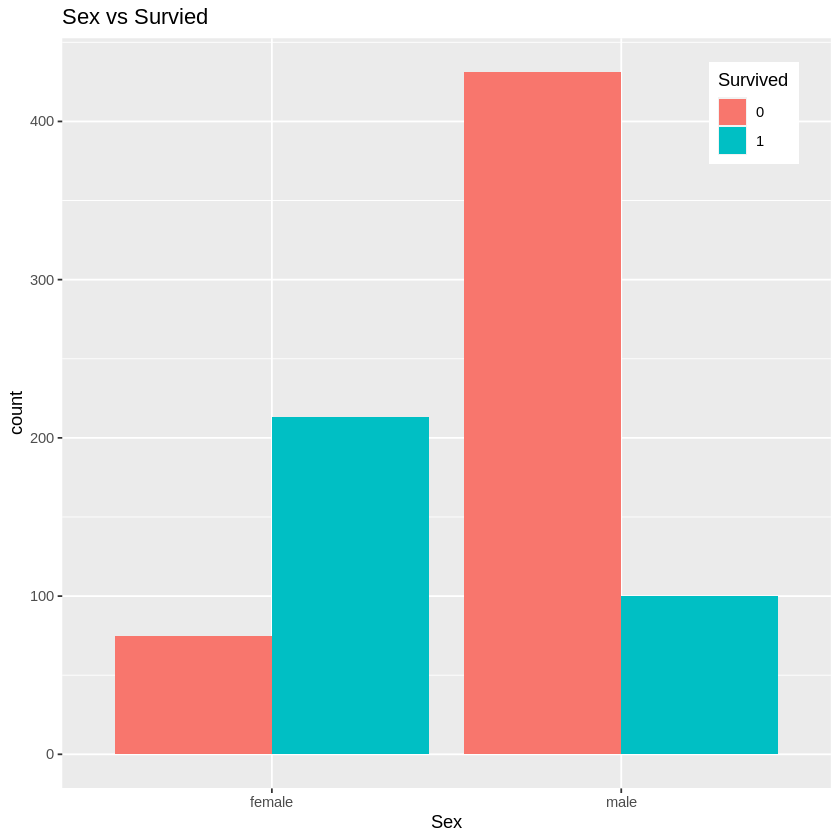

In [ ]:
ggplot(data= full[1:819,], aes(x = Sex, fill = factor(Survived))) +
  geom_bar(stat = "count",
           position = "dodge") +
  labs(title = "Sex vs Survied") +
  scale_fill_discrete(name = element_text("Survived")) +
  theme(legend.position = c(0.9,0.9))

### **<성별에 따른 나이에 대한 사망자 확인>**

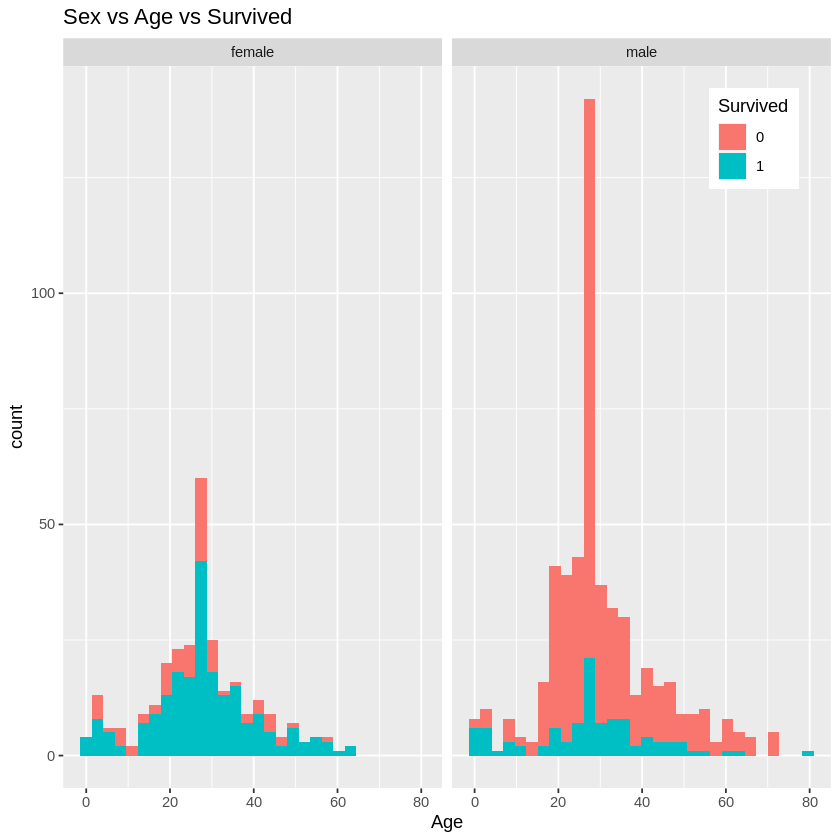

In [ ]:
ggplot(data =full[1:819,], aes(x = Age, fill = factor(Survived))) +
  geom_histogram(bins = 30) +
  facet_grid(.~Sex) +
  labs(title = "Sex vs Age vs Survived") +
  scale_fill_discrete(name = element_text("Survived")) +
  theme(legend.position = c(0.9,0.9))

### **<예측하기>**

In [ ]:
set.seed(1234)
model <- randomForest(factor(Survived) ~  Sex , data =train, importance = T, ntree = 500)
fitted <- predict(model)
print(model)


Call:
 randomForest(formula = factor(Survived) ~ Sex, data = train,      importance = T, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 21.32%
Confusion matrix:
    0   1 class.error
0 468  81   0.1475410
1 109 233   0.3187135


In [ ]:
prediction <- predict(model, test)
solution <- data.frame(Survived = prediction, PassengerID = test$PassengerId)
write.csv(solution, file = "submission3.csv", row.names = F)

#### **4. SVM(Support Vector Machine)**

In [ ]:
## 코드 작성

In [ ]:
training_set <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/train.csv") %>%
 as_tibble() ## train 데이터 
test_set <- fread("https://raw.githubusercontent.com/Jin0331/TA/master/data/titanic/test.csv") %>%
 as_tibble() ## test 데이터 

In [ ]:
str(training_set)

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


### **<자료형으로 바꾸기>**

In [ ]:
training_set$Pclass <- as.factor(training_set$Pclass)
training_set$Name <- as.character(training_set$Name)
training_set$Ticket <- as.character(training_set$Ticket)
training_set$Cabin <- as.character(training_set$Cabin)

str(training_set)

tibble [891 × 12] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
test_set$Pclass <- as.factor(test_set$Pclass)
test_set$Name <- as.character(test_set$Name)
test_set$Ticket <- as.character(test_set$Ticket)
test_set$Cabin <- as.character(test_set$Cabin)

str(test_set)

tibble [418 × 11] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:418] 892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr [1:418] "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr [1:418] "male" "female" "male" "male" ...
 $ Age        : num [1:418] 34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int [1:418] 0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int [1:418] 0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr [1:418] "330911" "363272" "240276" "315154" ...
 $ Fare       : num [1:418] 7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr [1:418] "" "" "" "" ...
 $ Embarked   : chr [1:418] "Q" "S" "Q" "S" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
test_set$Age[is.na(test_set$Age)] <- mean(test_set$Age, na.rm = T)


sapply(test_set, function(x){
  sum(is.na(x))
})

PassengerId      Pclass        Name         Sex         Age       SibSp 
          0           0           0           0           0           0 
      Parch      Ticket        Fare       Cabin    Embarked 
          0           0           1           0           0

In [ ]:
summary(training_set)

  PassengerId       Survived      Pclass      Name               Sex           
 Min.   :  1.0   Min.   :0.0000   1:216   Length:891         Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   2:184   Class :character   Class :character  
 Median :446.0   Median :0.0000   3:491   Mode  :character   Mode  :character  
 Mean   :446.0   Mean   :0.3838                                                
 3rd Qu.:668.5   3rd Qu.:1.0000                                                
 Max.   :891.0   Max.   :1.0000                                                
                                                                               
      Age            SibSp           Parch           Ticket         
 Min.   : 0.42   Min.   :0.000   Min.   :0.0000   Length:891        
 1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   Class :character  
 Median :28.00   Median :0.000   Median :0.0000   Mode  :character  
 Mean   :29.70   Mean   :0.523   Mean   :0.3816                     
 3rd Qu.:38.00 

### **<결측값 파악 후 결측값 처리>**

In [ ]:
sapply(training_set, function(x){
  sum(is.na(x))
})

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [ ]:
training_set<-na.omit(training_set)
sum(is.na(training_set))

[1] 0

### **<나이 전처리 및 시각화>**

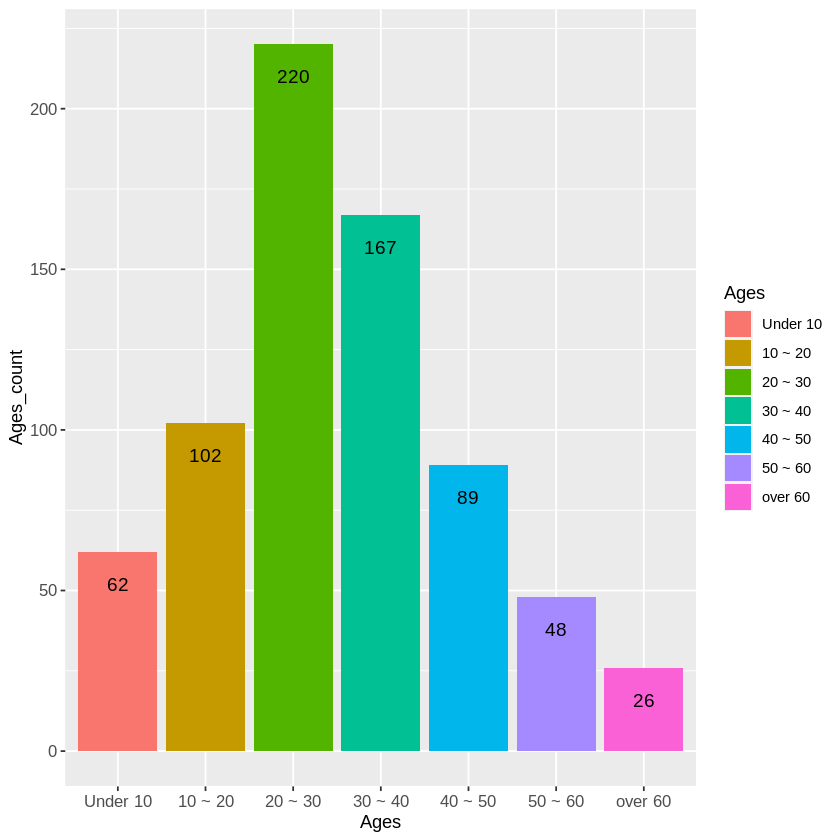

In [ ]:
training_set <- training_set %>% 
  mutate(Ages = case_when(
    Age < 10 ~ "Under 10",
    Age < 20 ~ "10 ~ 20",
    Age < 30 ~ "20 ~ 30",
    Age < 40 ~ "30 ~ 40",
    Age < 50 ~ "40 ~ 50",
    Age < 60 ~ "50 ~ 60",
    TRUE ~ "over 60"
  )) 

training_set$Ages <- 
  factor(training_set$Ages,
         levels = c("Under 10", "10 ~ 20", "20 ~ 30", "30 ~ 40", "40 ~ 50", "50 ~ 60", "over 60"))

data_cleanging <- training_set %>% 
  group_by(Ages) %>% 
  summarise(Ages_count = n())

ggplot(data_cleanging, aes(x = Ages, y = Ages_count, fill=Ages)) +
  geom_col() +
  geom_text(aes(label=(Ages_count)), vjust=3, hjust = 0.5,color="black", size=4) +
  theme(axis.text.x = element_text(size=10)) +
  theme(axis.text.y = element_text(size=10))

### **<SVM모델 생성 및 예측>**

In [ ]:
training_set$Survived <- as.factor(training_set$Survived)
str(training_set)

tibble [714 × 13] (S3: tbl_df/tbl/data.frame)
 $ PassengerId: int [1:714] 1 2 3 4 5 7 8 9 10 11 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 2 2 2 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 1 3 3 2 3 ...
 $ Name       : chr [1:714] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:714] "male" "female" "female" "female" ...
 $ Age        : num [1:714] 22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp      : int [1:714] 1 1 0 1 0 0 3 0 1 1 ...
 $ Parch      : int [1:714] 0 0 0 0 0 0 1 2 0 1 ...
 $ Ticket     : chr [1:714] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:714] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:714] "" "C85" "" "C123" ...
 $ Embarked   : chr [1:714] "S" "C" "S" "S" ...
 $ Ages       : Factor w/ 7 levels "Under 10","10 ~ 20",..: 3 4 3 4 4 6 1 3 2 1 ...
 - attr(*, ".internal.

In [ ]:
library(e1071)

svm_model <- svm(Survived ~ ., data = training_set)
svm_model

table(predict(svm_model, training_set), training_set$Survived)


Call:
svm(formula = Survived ~ ., data = training_set)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  588


   
      0   1
  0 423 277
  1   1  13

### **<Random Forest가 최상위 값으로 나왔습니다>**

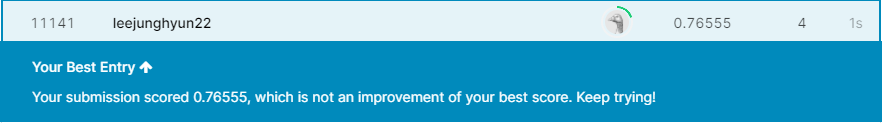

https://www.kaggle.com/c/titanic/rules 

에 접속하여 자신의 submission.csv를 등록하여 점수를 획득 하세요.